## Import required library

In [1]:
import nltk
nltk.download('punkt')
import pandas as pd
import spacy
import nltk
import string
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data preprocessing

In [3]:
import pandas as pd
top_df = pd.read_csv('Low_Artists.csv')
top_df.head()

,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,$copie,$O$,https://open.spotify.com/album/7Ja0MmZhnVdFjs5...,2010,4606632,"Ho$h, kykie kinders!\nOns gaan mos nou lekker ...",https://open.spotify.com/track/2rTjC1PYwenrBbA...,192,DieAntwoord
1,2•GOLDEN DAWN•7,2•GOLDEN DAWN•7,https://open.spotify.com/album/3kOlbclgj0Gglpz...,2018,6421323,"I've seen it all\nFace carved out of stone, un...",https://open.spotify.com/track/24JZqWlglnEfqYU...,289,DieAntwoord
2,Age Of Illusion,Age Of Illusion,https://open.spotify.com/album/56zia7byXUEiTcm...,2022,5273751,It's the Age of Illusion\nThe Age of Illusion\...,https://open.spotify.com/track/5jjH6vi22zsOAV2...,261,DieAntwoord
3,Alien,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy...,2016,17927575,I am a alien\n♪\nNo matter how hard I try I do...,https://open.spotify.com/track/2P8wndZLW1QnByi...,256,DieAntwoord
4,Baby's On Fire,Ten$ion,https://open.spotify.com/album/3FJydX4zwGGNIwl...,2012,144680835,Baby's on fire!\nBoom!\nBoom-boom!\nShowtime! ...,https://open.spotify.com/track/6mlGXuG5FmzcePH...,236,DieAntwoord


In [4]:
# Load the English model from spaCy
nlp = spacy.load("en_core_web_sm")

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in stop_words
    ]
    return " ".join(tokens)

In [5]:
Top_lyrics = top_df.copy()

In [6]:
Top_lyrics['Lyrics'] = top_df['Lyrics'].apply(preprocess_text)
Top_lyrics.head() 

,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,$copie,$O$,https://open.spotify.com/album/7Ja0MmZhnVdFjs5...,2010,4606632,kykie kinder ons gaan mos nou lekker naai nè g...,https://open.spotify.com/track/2rTjC1PYwenrBbA...,192,DieAntwoord
1,2•GOLDEN DAWN•7,2•GOLDEN DAWN•7,https://open.spotify.com/album/3kOlbclgj0Gglpz...,2018,6421323,see face carve stone unreadable pretty wise ug...,https://open.spotify.com/track/24JZqWlglnEfqYU...,289,DieAntwoord
2,Age Of Illusion,Age Of Illusion,https://open.spotify.com/album/56zia7byXUEiTcm...,2022,5273751,age illusion age illusion everyone beautiful e...,https://open.spotify.com/track/5jjH6vi22zsOAV2...,261,DieAntwoord
3,Alien,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy...,2016,17927575,alien matter hard try fit always sad lonely wa...,https://open.spotify.com/track/2P8wndZLW1QnByi...,256,DieAntwoord
4,Baby's On Fire,Ten$ion,https://open.spotify.com/album/3FJydX4zwGGNIwl...,2012,144680835,baby fire boom boom boom showtime motherfucker...,https://open.spotify.com/track/6mlGXuG5FmzcePH...,236,DieAntwoord


In [7]:
Top_lyrics = pd.DataFrame(Top_lyrics['Lyrics'])
Top_lyrics.head()

,Lyrics
0,kykie kinder ons gaan mos nou lekker naai nè g...
1,see face carve stone unreadable pretty wise ug...
2,age illusion age illusion everyone beautiful e...
3,alien matter hard try fit always sad lonely wa...
4,baby fire boom boom boom showtime motherfucker...


In [8]:
lyric_fillers = [
    "oh", "ooh", "ooo", "ah", "aah", "mm", "mmm", "mmh",
    "eh", "hey", "ha", "la", "da", "nah", "yeah", "yea","bitch", "shit", "fuck", "nigga", "na", "niggas", "whoa",
    "woah", "ya" , "hol", "whoo", "gon",
    "pop" , "know" , "say" , "man",
    "di", "huh", "uh" , "woo" ,"yah" ,"yo"
]

In [9]:
def clean_text_lda(text):
    text = text.lower()
    text = re.sub(r"[^\x00-\x7F]", " ", text)  # Remove ASCII outside
    text = re.sub(r"[^a-z\s]", " ", text)     # a–z
    text = re.sub(r"\s+", " ", text)          # Multiple spaces to single space
    pattern = r"\b(" + "|".join(lyric_fillers) + r")\b" # remove fillers
    text = re.sub(pattern, " ", text)
    return text.strip()

Top_lyrics["clean_lyrics"] = Top_lyrics["Lyrics"].apply(clean_text_lda)

### Double check

In [10]:
from collections import Counter

all_weird = []
for t in Top_lyrics["clean_lyrics"]:
    all_weird.extend(re.findall(r"[^a-zA-Z0-9\s]", t))

Counter(all_weird).most_common(20)

[]

## Wordcloud


In [11]:
Top_lyrics.head()

,Lyrics,clean_lyrics
0,kykie kinder ons gaan mos nou lekker naai nè g...,kykie kinder ons gaan mos nou lekker naai n ge...
1,see face carve stone unreadable pretty wise ug...,see face carve stone unreadable pretty wise ug...
2,age illusion age illusion everyone beautiful e...,age illusion age illusion everyone beautiful e...
3,alien matter hard try fit always sad lonely wa...,alien matter hard try fit always sad lonely wa...
4,baby fire boom boom boom showtime motherfucker...,baby fire boom boom boom showtime motherfucker...


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

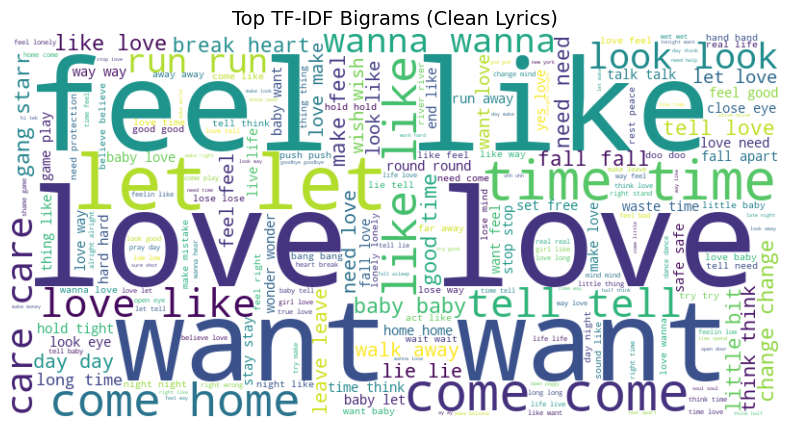

In [14]:

 # TF-IDF bigrams
texts = Top_lyrics['clean_lyrics'].tolist()
# TF-IDF bigrams
tfidf = TfidfVectorizer(
    ngram_range=(2, 2),
    stop_words="english"
)

X = tfidf.fit_transform(texts)

feature_names = tfidf.get_feature_names_out()
scores = X.sum(axis=0).A1

tfidf_scores = dict(zip(feature_names, scores))

# Word Cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.title("Top TF-IDF Bigrams (Clean Lyrics)", fontsize=14)
plt.axis("off")
plt.show()

## Sentiment analysis

In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [ ]:
# No NAN
texts = Top_lyrics["clean_lyrics"].fillna("").astype(str)

# VADER
sentiment_scores = texts.apply(sia.polarity_scores)

# DataFrame
sentiment_df = pd.DataFrame(list(sentiment_scores))

# Merge back to original data
Top_lyrics = pd.concat([Top_lyrics, sentiment_df], axis=1)

Top_lyrics.head()

,Lyrics,clean_lyrics,neg,neu,pos,compound
0,kykie kinder ons gaan mos nou lekker naai nè g...,kykie kinder ons gaan mos nou lekker naai n ge...,0.097,0.714,0.189,0.9217
1,see face carve stone unreadable pretty wise ug...,see face carve stone unreadable pretty wise ug...,0.323,0.406,0.271,-0.9571
2,age illusion age illusion everyone beautiful e...,age illusion age illusion everyone beautiful e...,0.032,0.717,0.251,0.9666
3,alien matter hard try fit always sad lonely wa...,alien matter hard try fit always sad lonely wa...,0.300,0.394,0.306,-0.5765
4,baby fire boom boom boom showtime motherfucker...,baby fire boom boom boom showtime motherfucker...,0.293,0.562,0.144,-0.9942


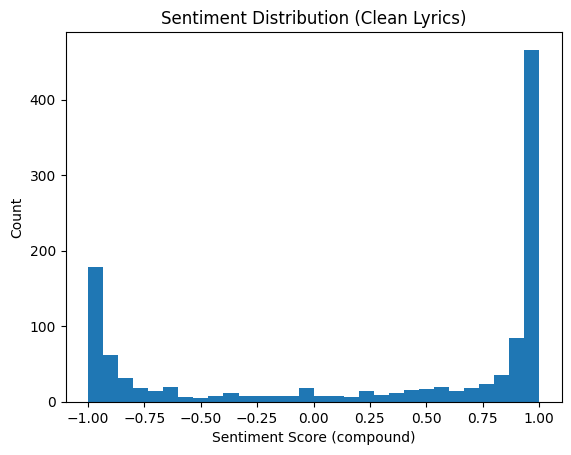

In [17]:
import matplotlib.pyplot as plt

plt.hist(Top_lyrics["compound"], bins=30)
plt.title("Sentiment Distribution (Clean Lyrics)")
plt.xlabel("Sentiment Score (compound)")
plt.ylabel("Count")
plt.show()

# TOP

In [18]:
import pandas as pd
top_df1 = pd.read_csv('Top_Artists.csv')
top_df1.head()

,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,https://open.spotify.com/album/7aJuG4TFXa2hmE4...,2024,3218891371,('Til I'm in the grave)\r\nI want you to stay\...,https://open.spotify.com/track/6dOtVTDdiauQNBQ...,210,Billie_Ilish
1,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",https://open.spotify.com/album/0S0KGZnfBGSIssf...,2019,1000101010,"Bite my tongue, bide my time\r\nWearing a warn...",https://open.spotify.com/track/3XF5xLJHOQQRbWy...,180,Billie_Ilish
2,GOLDWING,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDr...,2021,162632187,He hath come to the bosom of his beloved\r\nSm...,https://open.spotify.com/track/0FfqyjhB6Kspvit...,151,Billie_Ilish
3,Getting Older,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDr...,2021,334347982,"I'm getting older, I think I'm aging well\r\nI...",https://open.spotify.com/track/4HOryCnbme0zBnF...,244,Billie_Ilish
4,Your Power,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDr...,2021,526977340,Try not to abuse your power\r\nI know we didn'...,https://open.spotify.com/track/042Sl6Mn83JHyLE...,245,Billie_Ilish


In [19]:
# Load the English model from spaCy
nlp = spacy.load("en_core_web_sm")

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in stop_words
    ]
    return " ".join(tokens)

In [20]:
Top_lyrics1 = top_df1.copy()

In [21]:
Top_lyrics1['Lyrics'] = top_df1['Lyrics'].apply(preprocess_text)
Top_lyrics1.head() 

,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,https://open.spotify.com/album/7aJuG4TFXa2hmE4...,2024,3218891371,til grave want stay til grave til rot away dea...,https://open.spotify.com/track/6dOtVTDdiauQNBQ...,210,Billie_Ilish
1,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",https://open.spotify.com/album/0S0KGZnfBGSIssf...,2019,1000101010,bite tongue bide time wear warning sign wait t...,https://open.spotify.com/track/3XF5xLJHOQQRbWy...,180,Billie_Ilish
2,GOLDWING,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDr...,2021,162632187,hath come bosom beloved smile beareth high yea...,https://open.spotify.com/track/0FfqyjhB6Kspvit...,151,Billie_Ilish
3,Getting Older,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDr...,2021,334347982,get old think age well wish someone tell reaso...,https://open.spotify.com/track/4HOryCnbme0zBnF...,244,Billie_Ilish
4,Your Power,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDr...,2021,526977340,try abuse power know choose change might wanna...,https://open.spotify.com/track/042Sl6Mn83JHyLE...,245,Billie_Ilish


In [22]:
Top_lyrics1 = pd.DataFrame(Top_lyrics1['Lyrics'])
Top_lyrics1.head()

,Lyrics
0,til grave want stay til grave til rot away dea...
1,bite tongue bide time wear warning sign wait t...
2,hath come bosom beloved smile beareth high yea...
3,get old think age well wish someone tell reaso...
4,try abuse power know choose change might wanna...


In [23]:
def clean_text_lda(text):
    text = text.lower()
    text = re.sub(r"[^\x00-\x7F]", " ", text)  # Remove ASCII outside
    text = re.sub(r"[^a-z\s]", " ", text)     # a–z
    text = re.sub(r"\s+", " ", text)          # Multiple spaces to single space
    pattern = r"\b(" + "|".join(lyric_fillers) + r")\b" # remove fillers
    text = re.sub(pattern, " ", text)
    return text.strip()

Top_lyrics1["clean_lyrics"] = Top_lyrics1["Lyrics"].apply(clean_text_lda)

In [24]:
# No NAN
texts = Top_lyrics1["clean_lyrics"].fillna("").astype(str)

# VADER
sentiment_scores1 = texts.apply(sia.polarity_scores)

# DataFrame
sentiment_df1 = pd.DataFrame(list(sentiment_scores1))

# Merge back to original data
Top_lyrics1 = pd.concat([Top_lyrics1, sentiment_df1], axis=1)

Top_lyrics1.head()

,Lyrics,clean_lyrics,neg,neu,pos,compound
0,til grave want stay til grave til rot away dea...,til grave want stay til grave til rot away dea...,0.237,0.534,0.229,-0.7632
1,bite tongue bide time wear warning sign wait t...,bite tongue bide time wear warning sign wait t...,0.078,0.774,0.148,0.8519
2,hath come bosom beloved smile beareth high yea...,hath come bosom beloved smile beareth high yea...,0.048,0.736,0.216,0.9313
3,get old think age well wish someone tell reaso...,get old think age well wish someone tell reaso...,0.207,0.452,0.341,0.9729
4,try abuse power know choose change might wanna...,try abuse power choose change might wanna lo...,0.435,0.460,0.105,-0.9912


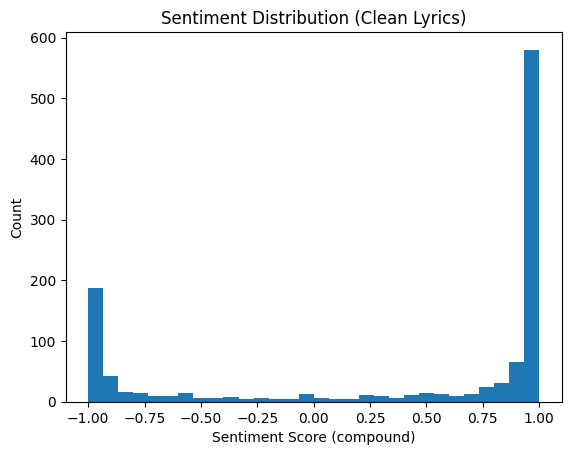

In [25]:
import matplotlib.pyplot as plt

plt.hist(Top_lyrics1["compound"], bins=30)
plt.title("Sentiment Distribution (Clean Lyrics)")
plt.xlabel("Sentiment Score (compound)")
plt.ylabel("Count")
plt.show()

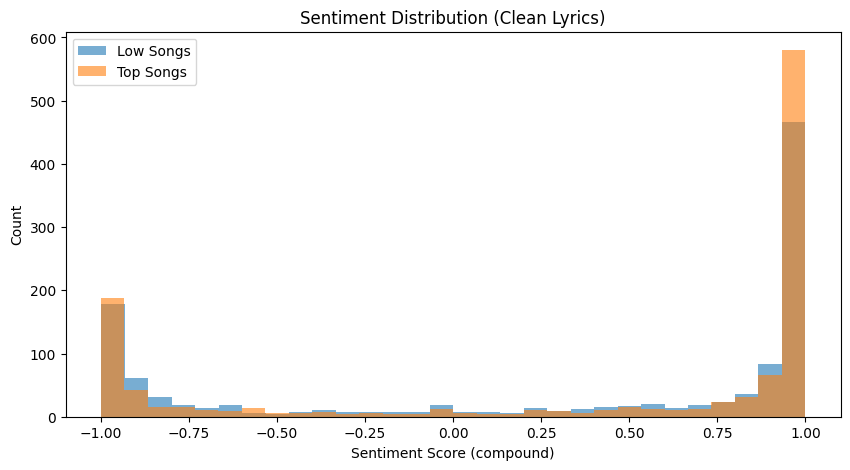

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.hist(
    Top_lyrics["compound"].dropna(),
    bins=30,
    alpha=0.6,
    label="Low Songs",
)

plt.hist(
    Top_lyrics1["compound"].dropna(),
    bins=30,
    alpha=0.6,
    label="Top Songs",
)

plt.title("Sentiment Distribution (Clean Lyrics)")
plt.xlabel("Sentiment Score (compound)")
plt.ylabel("Count")
plt.legend()
plt.show()